In [28]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv(filepath_or_buffer='data/beauty.csv', sep =';')

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [13]:
type(df['wage'])


pandas.core.series.Series

In [15]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [16]:
df.shape

(1260, 10)

In [17]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [19]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


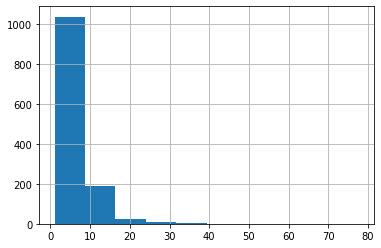

In [25]:
df['wage'].hist();

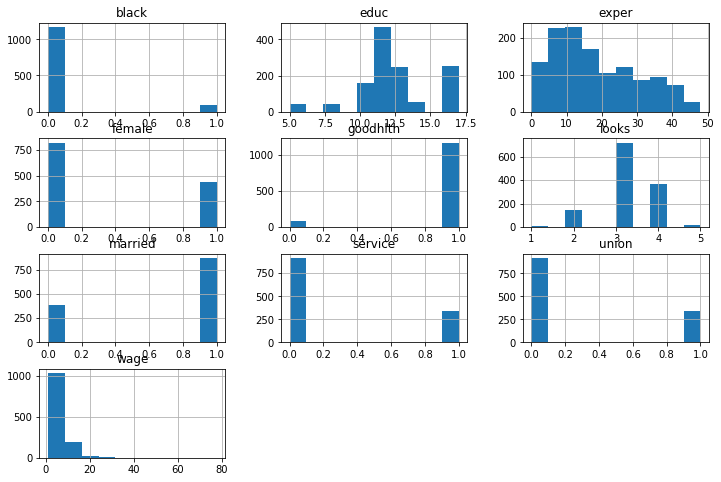

In [31]:

df.hist(figsize = (12,8));

In [35]:
df['female'].unique()

array([1, 0], dtype=int64)

In [34]:
df['female'].nunique()

2

In [36]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [37]:
df['looks'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [38]:
df['looks'].value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [39]:
df['goodhlth'].mean()

0.9333333333333333

In [41]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

### Indexing

#### iloc (~NumPy arrays)

In [44]:
df.iloc[:6, 5:7]

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,1


In [46]:
toy_df = pd.DataFrame({'age':[17, 32,56],
                      'salry':[56, 69, 120]}, index = ['Kate', 'Leo', 'Max'])

In [47]:
toy_df

,age,salry
Kate,17,56
Leo,32,69
Max,56,120


In [48]:
toy_df.iloc[1,1]

69

#### .loc

In [49]:
toy_df.loc[['Leo', 'Max'], 'age']

Leo    32
Max    56
Name: age, dtype: int64

### boolean indexing

In [59]:
df[df['wage']>40]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [61]:
df[(df['wage']>10) & (df['female']==1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


In [65]:
def gender_id_to_str(gender_id):
    return 'female' if gender_id == 1 else  'male'

### apply

In [67]:
df['female'].apply(gender_id_to_str).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [70]:
df['female'].apply(lambda gender_id: 'female' if gender_id == 1 else  'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

### map


In [71]:
df['female'].map({0: 'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

### GroupBy

In [73]:
df.loc[df['female']==0, 'wage'].median()

6.41

In [74]:
df.loc[df['female']==1, 'wage'].median()

3.75

In [81]:
for (gender_id, sub_dataframe) in df.groupby('female'):
    #print(gender_id)
    
    
   # print(sub_dataframe.shape)
    
    print('Median wages for {} are {}'.format('men' if gender_id ==0
                                              else 'women', 
                                             sub_dataframe['wage'].median()))

Median wages for men are 6.41
Median wages for women are 3.75


In [83]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

#### crosstab

In [84]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [85]:
import seaborn as sns

In [86]:
df['educ'].nunique()

8

In [88]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

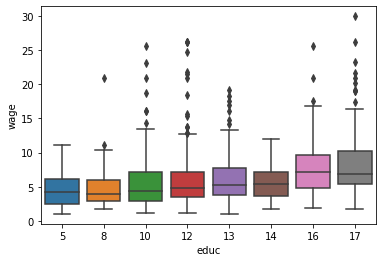

In [93]:
sns.boxplot(x = 'educ', y ='wage', data = df[df['wage'] <30])